In [10]:
import pandas as pd

# I might not need this as I am already in the directory I want to be in
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# naming df as df instead of df_embiid this time. It will cause less confusion when I use a player that is not Joel Embiid

df = pd.read_csv('joelembiid_gamelog.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,G,Date,Age,Tm,Opp,outcome,GS,MP,...,PF,PTS,GmSc,+/-,FPTS,g,HOME_GAME,back_to_back,win,fpts_per_36
0,0,0,1.0,2020-12-23,26-282,PHI,WAS,W (+6),1,34.8,...,3.0,29.0,23.6,-2.0,48.8,1,1,0,1,50.5
1,1,1,2.0,2020-12-26,26-285,PHI,NYK,W (+20),1,30.6,...,3.0,27.0,21.7,18.0,47.0,1,0,0,1,55.3
2,2,2,NaN,2020-12-27,26-286,PHI,CLE,L (-24),Did Not Dress,0.0,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0.0
3,3,3,3.0,2020-12-29,26-288,PHI,TOR,W (+7),1,37.9,...,1.0,29.0,26.3,15.0,61.2,1,1,0,1,58.1
4,4,4,4.0,2020-12-31,26-290,PHI,ORL,W (+24),1,26.7,...,2.0,21.0,20.0,23.0,40.8,1,0,0,1,55.0


In [12]:
# how does fpts_per_36 impact philly's win/loss

# groupy by win and round to 1 decimal

df.groupby(['win'])['fpts_per_36'].mean().round(1)

# problem is that points for game not played is taking into account here. and this is a small dataset

win
0    17.6
1    57.7
Name: fpts_per_36, dtype: float64

In [13]:
# adding the groupby in for games actually played will make a big difference
# there has to be a better way of doing this 

df.groupby(['g','win'])['fpts_per_36'].mean().round(1)

g  win
0  0       0.0
1  0      52.8
   1      57.7
Name: fpts_per_36, dtype: float64

In [14]:
# do home games matter in the current season for Joel Embiid's Fantasy production
df.groupby(['g','HOME_GAME', 'win'])['fpts_per_36'].mean().round(1)

g  HOME_GAME  win
0  0          0       0.0
   1          0       0.0
1  0          0      52.8
              1      61.8
   1          1      56.0
Name: fpts_per_36, dtype: float64

In [15]:
# create dateframe not including games missed by Embiid
df_played = df[df.g==1]


home_p = df_played[df.win==1].groupby(['HOME_GAME'])['FPTS'].mean()
away_p = df_played[df.win==0].groupby(['HOME_GAME'])['FPTS'].mean()

pd.DataFrame({'home':home_p, 'away':away_p})

<ipython-input-15-2d8b5f3d07df>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_p = df_played[df.win==1].groupby(['HOME_GAME'])['FPTS'].mean()
<ipython-input-15-2d8b5f3d07df>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  away_p = df_played[df.win==0].groupby(['HOME_GAME'])['FPTS'].mean()


,home,away
HOME_GAME,,
0,50.70,37.8
1,52.67,NaN


In [16]:
df_played.pivot_table(index= 'HOME_GAME', columns= 'win', values= 'FPTS', aggfunc=np.mean)

win,0,1
HOME_GAME,,
0,37.8,50.70
1,NaN,52.67


<AxesSubplot:xlabel='HOME_GAME'>

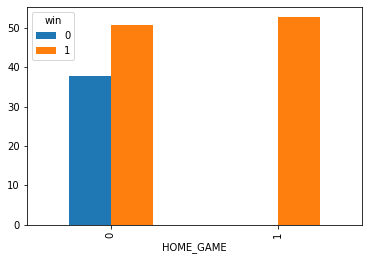

In [17]:
df_played.pivot_table(index= 'HOME_GAME', columns= 'win', values= 'FPTS', aggfunc=np.mean).plot(kind='bar')

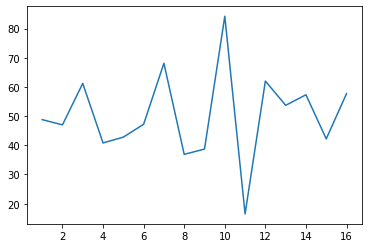

In [18]:
x = df_played['G']
y = df_played['FPTS']
plt.plot(x,y)
plt.show()

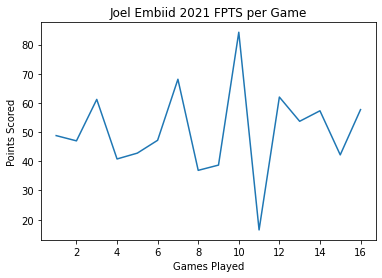

In [19]:
x = df_played['G']
y = df_played['FPTS']

plt.plot(x,y)
plt.xlabel("Games Played")
plt.ylabel('Points Scored')
plt.title('Joel Embiid 2021 FPTS per Game')
plt.show()

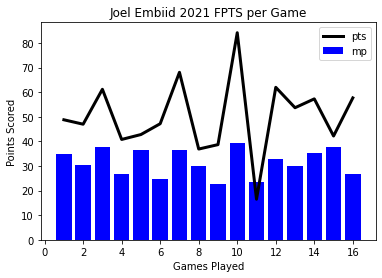

In [20]:
x = df_played['G']
y = df_played['FPTS']
mp = df_played['MP']

plt.plot(x, y, color = 'k', linewidth = 3, label ='pts')
plt.bar(x, mp, color = 'b', label = 'mp')


plt.xlabel("Games Played")
plt.ylabel('Points Scored')
plt.title('Joel Embiid 2021 FPTS per Game')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Histogram of Joel Embiid FPTS per game')

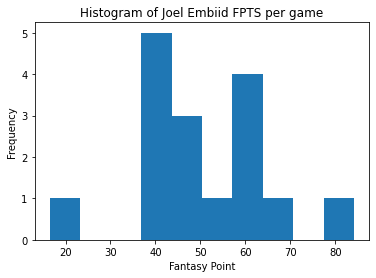

In [21]:
plt.hist(y)
plt.xlabel('Fantasy Point')
plt.ylabel('Frequency')
plt.title('Histogram of Joel Embiid FPTS per game')

Text(0.5, 1.0, 'Histogram of Joel Embiid FPTS per game')

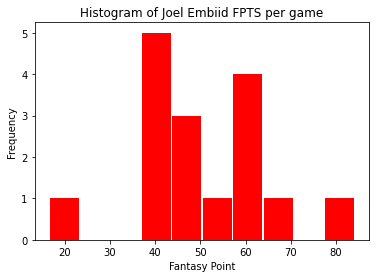

In [23]:

plt.hist(y, rwidth=.95, color = 'r')
plt.xlabel('Fantasy Point')
plt.ylabel('Frequency')
plt.title('Histogram of Joel Embiid FPTS per game')